In [75]:
#import library
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Data Preparation

In [76]:
#import dataset
data = pd.read_csv('brain_stroke.csv')
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [77]:
print(data.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [78]:
data['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

<AxesSubplot:>

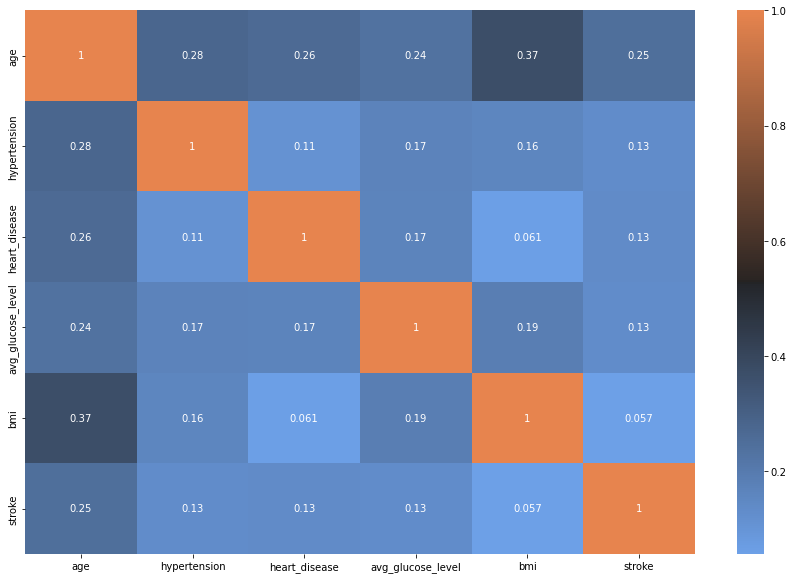

In [79]:
#correlation check
corr = data.corr()
plt.subplots(figsize=(15,10))

sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))

# Preprocessing

In [80]:
le = preprocessing.LabelEncoder()
le.fit(data["gender"])
data["gender"] = le.transform(data["gender"])
gender_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(gender_labels)

{'Female': 0, 'Male': 1}


In [81]:
le.fit(data["ever_married"])
data["ever_married"] = le.transform(data["ever_married"])
ever_married_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(ever_married_labels)

{'No': 0, 'Yes': 1}


In [82]:
le.fit(data["work_type"])
data["work_type"] = le.transform(data["work_type"])
ever_married_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(ever_married_labels)

{'Govt_job': 0, 'Private': 1, 'Self-employed': 2, 'children': 3}


In [83]:
le.fit(data["Residence_type"])
data["Residence_type"] = le.transform(data["Residence_type"])
ever_married_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(ever_married_labels)

{'Rural': 0, 'Urban': 1}


In [84]:
le.fit(data["smoking_status"])
data["smoking_status"] = le.transform(data["smoking_status"])
ever_married_labels = dict(zip(le.classes_, le.transform(le.classes_)))
print(ever_married_labels)

{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [85]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [93]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split Data

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

# Modelling

In [88]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [89]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [90]:
y_pred = knn.predict(x_test)

# Data Evaluation

In [91]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[931   4]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       935
           1       0.00      0.00      0.00        62

    accuracy                           0.93       997
   macro avg       0.47      0.50      0.48       997
weighted avg       0.88      0.93      0.91       997



In [92]:
knn.score(x_test, y_test)

0.9338014042126379